<h1> The Battle Of Neighborhoods. </h1> 
<h3> Which neighborhoods in the Stockholm area are better suited for relocation given activities of interest and accommodation prices </h3>

## Table of Contents
1. <a href="#intro"> Introduction / Background </a>
    1. <a href="#background"> Background </a>
    2. <a href="#problem"> Problem description </a>
    3. <a href="#targetA"> Target Audience </a>
2. <a href="#data"> Data Collection</a>
    1. <a href="#komun"> Stockholm Komuns (Municipalities or Boroughs) </a>
    2. <a href="#district"> Stockholm Districs (Neighborhoods) </a>
    3. <a href="#venue"> Venue data </a>
        1. <a href="#exploreAPICat"> Explore API for fetching categories </a>
        2. <a href="#exploreAPIVen"> Explore API for fetching all venues</a>
    4. <a href="#price"> House prices </a>
3. <a href="#method"> Methodology</a>
    1. <a href="#exploratory"> Exploratory data analysis</a>
    2. <a href="#analysis"> Data analysis</a>
    3. <a href="#ml"> Machine learnings</a>
4. <a href="#result"> Results</a>
5. <a href="#discussion"> Discussion</a>
6. <a href="#conclusion"> Conclusion</a>

<div id="intro"> <h2>Introduction / Background </h2> </div>

<div id="background"><h3>1.1 Background</h3></div>

Although Sweden is quite an unpopulated country, with around 10 million people overall, the country is quite extensive in area. The metropolitan area of Stockholm is the largest metropolitan area in Sweden and can be compared in size with cities like Paris, Barcelona and Milan. This means that there are over 150 neighborhoods where people can establish residence and go around their daily routines. Having lived in Stockholm for more than 5 years in several of these neighborhoods, i have noticed 4 main things that Swedish people, in general, really enjoy doing. The number one is to 'Fika'. Fika is a concept and is immerse within the culture of the country. It means to gather up with friends or colleagues for a coffee or tea and something small to eat, like a bun or a cake. The number two is outdoor activities such as hiking, skiing or bathing in the lakes. Being an archipelago, Stockholm is fully surrounded by nature which is highly appreciated it by locals, especially in the summer. Number three is to drink and dance. Although this is especially true for younger generations, people from all ages enjoy a lot having a drink in their local pubs, and are starting to get more attracted to local breweries around Stockholm. The number four is eating out in restaurants around the neighborhood. Whether is a lazy weekend day with no cooking, a socializing event or a curiosity for new gastronomy, locals like to eat out. 

<div id="problem"><h3>1.2 Problem description</h3></div>

Part of the criteria for people in Stockholm to move to a specific neighborhood, apart from accommodation prices, is the type of activities one can do around the neighborhood. Can you grab a cup of coffee nearby with a friend? is there nature around where you could go for a swim in the summer and maybe be a little bit isolated from people? Is it possible to go drinking with colleagues and be able to walk back home? Or is there a neighborhood offering all these possibilities? To answer these questions, one could of course manually investigate each neighborhood, visit them or check online what activities are available around the localities. Given Stockholm's vast area and the big number of neighborhoods, this would be a tedious and time consuming process. Instead, one could automatically create a sort of profile for each neighborhood, group them, and make this information available and visualizable for people to decide which options are more suitable. <br>
This project aims at identifying clusters of similar neighborhoods in Stockholm taking into account the availability to carry on one or more of swedes preferred activities (generally speaking), namely: to Fika, outdoor activities, to drink/party and to eat out in restaurants. Additionally, the report will try to contrast these clusters with the average municipality accommodation prices. By doing so, the goal is to help people living in Stockholm to identify which neighborhood better match their profiles, and which ones would be a better option for them if they decide to relocate within Stockholm.

<div id="targetA"><h3>1.3 Target Audience</h3></div>

This project would be of interest to real state companies or real state websites looking to help its clients when relocating / searching for new places to live within Stockholm. By having a clear segmentation of neighborhoods based on popular swedish activities and having average price information, the agencies could match a customer profile to filter out best suited neighborhoods

<div id="data"> <h2>Data Collection</h2> </div>

Sweden's territory is divided into Counties. Counties itself are divided into municipalities / Boroughs or what is known in Sweden as 'Komuns'. If one zooms in even further, we find that each komun is divided into several districts or neighborhoods. In this project, data from neighborhoods within Stockholm county will be considered.

Following data sources will be needed to extract/generate the required information:

- Source file(s) containing information on Stockholm Counties and komuns [1].
- Wikipedia for scraping neighborhood names for a given komun [2]
- Google Maps API geocoding for finding the locations of each neighborhood [3]
- Foursquare API for finding venues and venue categories around a given point [4]
- Hemnet website for scraping house prices within komuns [5]

<div id="komun"><h3>2.1 Stockholm Komuns (Municipalities or Boroughs)</h3></div>

Stockholm has a total of 26 komuns. <br> 
Since we want to analyze neighborhoods, we need to obtain which are Stockholm's Komuns so we can later obtain its corresponding neighborhoods.<br> 
Information about Sweden's Counties and Komuns is available to download on the web for free. <br> 
There are many sources for this information. The repo in reference [1] both County level and Municipality level information within Sweden. This information includes the geographical limits and borders of each County / Municipality 

Note: we use the previous source for obtaining existing komun names in Sweden. However, for visualizing border limits between komuns in a map, the referenced topojson was not possible to use. For this reason we use an additional data source for that. We use a geojson public data set containing the delimiting borders between Komuns in Sweden, which is used for visualizing Avg. house prices per komun [6]

In [1]:
# Do neccesary imports
import requests # library to handle requests
import json # library for handling json data

In [2]:
# Obtain json with swedish komun / Municipality information
!wget -O 'sweden_municipalities.json' https://raw.githubusercontent.com/deldersveld/topojson/master/countries/sweden/sweden-municipalities.json

--2020-08-02 00:36:12--  https://raw.githubusercontent.com/deldersveld/topojson/master/countries/sweden/sweden-municipalities.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.124.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.124.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141143 (138K) [text/plain]
Saving to: ‘sweden_municipalities.json’

sweden_municipaliti 100%[===================>] 137.83K  --.-KB/s    in 0.03s   

2020-08-02 00:36:12 (4.43 MB/s) - ‘sweden_municipalities.json’ saved [141143/141143]



In [4]:
# Open downloaded municipality file and store the data in a variable
with open('sweden_municipalities.json') as json_data:
    sweden_data = json.load(json_data)

In [5]:
# Parse the json data and store all available komuns in a variable
komun_names = []

komuns = sweden_data['objects']['SWE_adm2']['geometries']
for komun in komuns:
    # Only store komuns from the stockholm county, since we are only looking at Stockholm metropolitan area.
    if komun['properties']['NAME_1'] == 'Stockholm':
        komun_names.append(komun['properties']['NAME_2'])
komun_names

['Österåker',
 'Botkyrka',
 'Danderyd',
 'Ekerö',
 'Haninge',
 'Huddinge',
 'Järfälla',
 'Lidingö',
 'Nacka',
 'Norrtälje',
 'Nykvarn',
 'Nynäshamn',
 'Södertälje',
 'Salem',
 'Sigtuna',
 'Sollentuna',
 'Solna',
 'Stockholm',
 'Sundbyberg',
 'Täby',
 'Tyresö',
 'Upplands-Bro',
 'Upplands-Väsby',
 'Värmdö',
 'Vallentuna',
 'Vaxholm']

<div id="district"><h3>2.2 Stockholm Districts (Neighborhoods)</h3></div>

Once we have the name of the Komuns, we need to obtain their corresponding districts. There is no open dataset in the web containing this information. So, the procedure to obtain this data is to scrape the information from wikipedia.<br>
If we look at the main wikipedia page for Stockholm County: https://en.wikipedia.org/wiki/Stockholm_County we can observe a table with all Komun names, with a link to its corresponding wikipedia page. These individual pages of each Komun are used to obtain the corresponding neighborhoods. Additionally, Google's Geolocation API is used to obtain the center location point of each gathered neighborhood.

Each komun has a corresponding page in wikipedia where the names of the corresponding districts / neigborhoods can be scrapped. The wikipedia pages follows the pattern: https://en.wikipedia.org/wiki/[komun_name]_Municipality

To keep this notebook with relevant information and no so extent, the code for getting all neighborhoods from wikipedia is hidden. A Json file 'stockholm_neighborhoods.json' containing the information and output is generated and stored in the repo.

<h4> Create Dataframe with neighborhood information, including the location of each neighborhood </h4>

In [6]:
# Install geocoder library to get coordinates using Googles API
!pip install geocoder

     |████████████████████████████████| 102kB 6.6MB/s ta 0:00:011
     |████████████████████████████████| 829kB 7.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


In [7]:
# Handle google API
import geocoder

import numpy as np
import pandas as pd  # Library for using Pandas dataframes

import json # library for handling json data

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [8]:
# Define function for returning a location object based on the neighborhood name using geocoder library for using GOOGLE API
# NOTE: API key was explicitly hidden.
def getLocationGoogle(neighborhood):
    
    geo = geocoder.google(neighborhood+' stockholm',key=GOOGLE_API_KEY)
    
    location = {}
    location['address'] = geo.address
    location['country'] = geo.country
    location['city'] = geo.city
    location['state'] = geo.state
    location['postal_number'] = geo.postal
    location['postal_town'] = geo.postal_town
    location['latitude'] = geo.latlng[0] if (geo.latlng is not None) else None
    location['longitude'] = geo.latlng[1] if (geo.latlng is not None) else None
    location['confidence'] = 9
    return location

In [8]:
# Read json file with neighborhood,komun and county names
with open('stockholm_neighborhoods.json') as json_data:
    stockholm_neighborhood_data = json.load(json_data)

In [ ]:
# Create neighborhood dataFrame

column_names = ['Neighborhood','Municipality','County','Latitude','Longitude']
neighborhood_df = pd.DataFrame(columns=column_names)

for neighborhood in stockholm_neighborhood_data['features']:
    location = getLocationGoogle(neighborhood['properties']['neighborhood'] + ' ' + neighborhood['properties']['municipality'])
    latitude = location['latitude']
    longitude = location['longitude']
    print('The geograpical coordinate of neighborhood: {}, komun: {} are {}, {}.'.format(neighborhood['properties']['neighborhood'],neighborhood['properties']['municipality'],latitude, longitude))
    
    neighborhood_df = neighborhood_df.append({'Neighborhood':neighborhood['properties']['neighborhood'],
                                              'Municipality':neighborhood['properties']['municipality'],
                                              'County':neighborhood['properties']['county'],
                                              'Latitude':latitude,
                                              'Longitude':longitude},ignore_index=True)
neighborhood_df.head()

<h4> Save data frame with neighboorhod information (including location).</h4>
By doing this, next time we can just read the file and not perform ALL API calls all over again 

In [ ]:
neighborhood_df.to_csv('stockholm_neighborhoods_withLocations.csv',index=False)

<h4> Read neighboorhod information (including location) into Dataframe. </h4>
The name of the file should be 'stockholm_neighborhoods_withLocations.csv'

In [9]:
neighborhood_df = pd.read_csv('stockholm_neighborhoods_withLocations.csv')
neighborhood_df.head(10)

,Neighborhood,Municipality,County,Latitude,Longitude
0,Rydbo,Österåker,Stockholm,59.464170,18.182120
1,Skärgårdsstad,Österåker,Stockholm,59.483144,18.407275
2,Svinninge,Österåker,Stockholm,59.454130,18.277120
3,Åkersberga,Österåker,Stockholm,59.480277,18.310783
4,Österskär,Österåker,Stockholm,59.466667,18.300000
5,Fittja,Botkyrka,Stockholm,59.250138,17.864999
6,Alby,Botkyrka,Stockholm,59.240555,17.858093
7,Hallunda,Botkyrka,Stockholm,59.246070,17.823123
8,Norsborg,Botkyrka,Stockholm,59.246070,17.823123
9,Eriksberg,Botkyrka,Stockholm,59.236018,17.838196


<div id="venue"><h3>2.3 Venue data</h3></div>

The Foursquare API is used to obtain information related to the venues around a given neighborhood.

<div id="exploreAPICat"><h4>2.3.1 Explore API for fetching categories </h4></div>

The explore endpoint of the Foursquare API is used to obtain venue categories related to a specified location and query. By doing this, we can obtain all related venue categories to a specific activity such as 'Fika'. Consequently, we can group together all venues that belong to the categories found and have a rough idea of the weight of 'Fika' venues around the neighborhood area.

NOTE: The credentials for the foursquare API were explicitly hidden

In [10]:
CLIENT_ID = 'InvalidId' # your Foursquare ID
CLIENT_SECRET = 'InvalidSecret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: InvalidId
CLIENT_SECRET:InvalidSecret


<h4>Define function for obtaining unique categories given a search query and location coordinates</h4>

The search radio is set to 2000 meters

In [11]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

def getQueryCategories(query,names,latitudes, longitudes, radius=500):
    
    radius = 2000
    LIMIT = 200

    categories_set=set([])
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            lat,
            lng, 
            VERSION, 
            query, 
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for v in results:
            #print(v['venue']['categories'][0]['name'])
            categories_set.add(v['venue']['categories'][0]['name'])
        
    return(list(categories_set))

Search all categories related to the provided activities.

In [11]:
activities = ['Fika','Outdoor','Dance','Drink','Restaurant']
categories = {}

for activity in activities:
    categories[activity] = getQueryCategories(query=activity,
                                names=neighborhood_df['Neighborhood'],
                                latitudes=neighborhood_df['Latitude'],
                                longitudes=neighborhood_df['Longitude'])
    

KeyboardInterrupt: 

<h4> Dump categories in a file for future reading.</h4>
By doing this we can avoid fetching the categories from foursquare everytime we execute the notebook (since API calls are limited)

In [ ]:
import io

categories_file = open('activities_categories.json','w')
json.dump(categories,categories_file)
categories_file.close()

<h4> Read categories from file </h4>
File name should be 'activities_categories.json' By doing this we can avoid fetching the categories from foursquare everytime we execute the notebook (since API calls are limited). 

In [12]:
categories_file = open("activities_categories.json", "r")
activity_categories = categories_file.read()

<div id="exploreAPIVen"><h4>2.3.2 Explore API for obtaining all venues</h4></div>

The explore endpoint of the Foursquare API is used to obtain all venues around a neighborhood within a certain radio range. Once we have the venues, the categories obtained in the previous step are used to group certain venues and procede with neighborhood grouping<br>
NOTE: Using the free version of Foursquare API there is a limitation of a 100 venues that can be obtained in a given query

<h4> Define function to obtain a dataframe with venue Information, given a coordinate point</h4>
The defined radio of search is default to 500 meters but set to 2000 meters <br>

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    radius = 2000
    LIMIT = 200
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    # AG. The below is the same as writing [item for item in venues_list] dont why they wrote it like that
    nearby_venues_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_df.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_df)

In [16]:
# There is venue category called 'neighborhood' 
stockholm_venues_df = getNearbyVenues(names=neighborhood_df['Neighborhood'],
                                   latitudes=neighborhood_df['Latitude'],
                                   longitudes=neighborhood_df['Longitude']
                                  )
stockholm_venues_df.head()

Rydbo
Skärgårdsstad
Svinninge
Åkersberga
Österskär
Fittja
Alby
Hallunda
Norsborg
Eriksberg
Tumba
Tullinge
Vårsta
Danderyd
Djursholm
Stocksund
Enebyberg
Adelsö
Munsö
Ekerö
Färingsö
Lovö
Brandbergen
Dalarö
Handen
Jordbro
Norrby
Sågen
Vega
Vendelsö-Gudö
Vendelsömalm
Västerhaninge
Tungelsta


KeyboardInterrupt: 

<h4> Save Stockholm venues to csv file</h4>
By doing this we can avoid having to obtain all the venues again using Foursquare API. We can read them directly from the file

In [ ]:
stockholm_venues_df.to_csv('stockholm_venues.csv',index=False)

<h4> Read Stockholm venues from csv file</h4>
File name is stockholm_venues.csv

In [14]:
stockholm_venues_df = pd.read_csv('stockholm_venues.csv')
print('There are {} uniques categories.'.format(len(stockholm_venues_df['Venue Category'].unique())))

There are 272 uniques categories.


<div id="price"><h3>2.4 House prices</h3></div>

In order to obtain average housing prices for each Komun and display it as reference for the cluster groups, the website www.hemnet.se is used. This is the main real state website used in Sweden for searching apartments to buy. Hemnet provides an API to make queries and requests. However, given that it was a little cumbersome to set it up and there is a time limitation for the project, the data is scrapped instead from URLs. This is not the most elegant approach but is quite fast to set up and obtain the desired results. 

In [15]:
# Package for scraping and getting info out of web pages
! pip install beautifulsoup4

     |████████████████████████████████| 122kB 16.7MB/s eta 0:00:01


In [16]:
# Import the neccesary libraries

# beautifulsoup library
from bs4 import BeautifulSoup
# library for making http requests
import requests

import re
import unicodedata


# Pandas library
import pandas as pd

<h4>Scrap komun average house prices from hemnet</h4>
In order to scrap average house prices per komun from hemnet, a komun id is needed to know what to search for. these ids have been added to a dictionary with the komun name as key and the ids as values. We will iterate through the komun names fetched at the beginning of this notebook in the Stockholm Komuns section

In [17]:
# Dictionary with with komun name as key and id of the komun as value
hemnet_komun_ids = {"Botkyrka":17885,"Danderyd":17892,"Ekerö":17896,"Haninge":17928,"Huddinge":17936,"Järfälla":17951,
                    "Lidingö":17846,"Nacka":17853,"Norrtälje":18003,"Nykvarn":17855,"Nynäshamn":18006,"Salem":18019,
                    "Sollentuna":18027,"Solna":18028,"Stockholm":18031,"Sundbyberg":18042,"Södertälje":17775,
                    "Tyresö":17792,"Täby":17793,"Upplands-Bro":17799,"Upplands-Väsby":17798,"Vallentuna":17804,
                    "Vaxholm":17808,"Värmdö":17818,"Österåker":17769,"Sigtuna":18020}

#hemnet_komun_ids

In [18]:
def getAverageHousePrices(locations):
    komun_avg_prices = {}
    for location in locations:
        page = requests.get('https://www.hemnet.se/bostader?location_ids={}'.format(hemnet_komun_ids[location]) )
        
        soup = BeautifulSoup(page.content,'html.parser')
        prices = []
        for element in soup.findAll('div',text=re.compile(".*kr/m²")):
            pricexsq2 = element.text.replace('kr/m²','').strip().replace('\xa0', '')
            if pricexsq2 is not '':
                prices.append(int(pricexsq2))
        
        komun_avg_prices[location] = sum(prices) / len(prices)
    return komun_avg_prices

In [19]:
average_komun_price = getAverageHousePrices(komun_names)

In [20]:
average_komun_price

{'Österåker': 40173.27272727273,
 'Botkyrka': 31642.044444444444,
 'Danderyd': 71065.10638297872,
 'Ekerö': 40714.0,
 'Haninge': 31058.275,
 'Huddinge': 38086.51351351351,
 'Järfälla': 35290.20930232558,
 'Lidingö': 68233.13157894737,
 'Nacka': 53825.541666666664,
 'Norrtälje': 26373.42105263158,
 'Nykvarn': 37577.7,
 'Nynäshamn': 21651.166666666668,
 'Södertälje': 27889.852941176472,
 'Salem': 31998.238095238095,
 'Sigtuna': 30732.153846153848,
 'Sollentuna': 41170.936170212764,
 'Solna': 56134.03921568627,
 'Stockholm': 63323.27450980392,
 'Sundbyberg': 51640.9,
 'Täby': 41240.94871794872,
 'Tyresö': 40524.92105263158,
 'Upplands-Bro': 31731.444444444445,
 'Upplands-Väsby': 35880.45,
 'Värmdö': 44626.380952380954,
 'Vallentuna': 39174.916666666664,
 'Vaxholm': 40655.72222222222}

<div id="method"> <h2>Methodology</h2> </div>

In general, the methodology used in this report consist in 3 overall steps: 
First an exploratory data analysis is carried on, where we visualize the most important aspects of the raw data collected in the previous section. 
We continue doing data analysis and preparing the data for applying machine learning on it. We lastly perform machine learning clustering on the data to try to draw some conclusions towards our problem statement. 

<div id="exploratory"><h3>3.1 Exploratory data analysis</h3></div>

<h4> First, we want to visualize how are neighborhoods spread within Stockholm county</h4>
Folium library is used for map visualization. <br>
The Nominatum class from geocoder is used to obtain coordinates for Stockholm center point without doing a request to GOOGLE's geolocation API

In [21]:
# Install geopy package
!pip install geopy

     |████████████████████████████████| 112kB 5.0MB/s eta 0:00:01


In [22]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [23]:
# Obtain center point for Stockholm city
geolocator = Nominatim(user_agent="se_explorer")
location = geolocator.geocode("Stockholm")
latitude = location.latitude
longitude = location.longitude

# create map of Stockholm using latitude and longitude values
map_stockholm = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhood_df['Latitude'], neighborhood_df['Longitude'], neighborhood_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stockholm)
    
map_stockholm

Let's explore how many neighborhoods we have per komun. This would give us an idea of how big the different municipalities/komuns are.

Text(0.5, 1.0, 'Number of neighborhoods per komun')

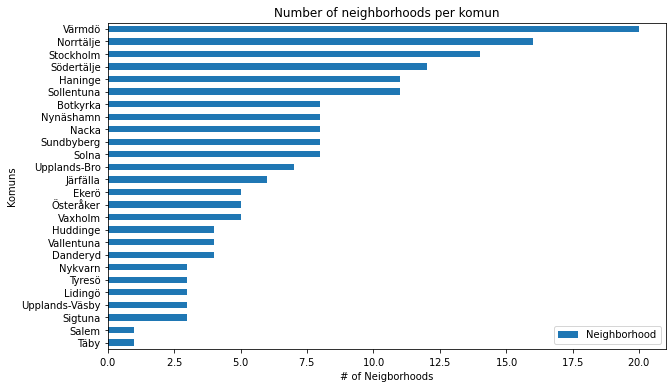

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

neighborhood_count_df = neighborhood_df[['Neighborhood','Municipality']].groupby('Municipality').count()

# Sort by the number of neighborhoods in the Municipality / Komun
neighborhood_count_df.sort_values(by="Neighborhood",ascending=True,inplace=True)

ax = neighborhood_count_df.plot(kind='barh',figsize=(10,6))

ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

plt.xlabel('# of Neigborhoods')
plt.ylabel('Komuns') 
plt.title('Number of neighborhoods per komun') 


<h4> Explored filtered categories for activities</h4>

In Section 2.3.1 'Explore API for fetching categories' venue categories related to all 4 activities (fika,outdoor,drink&dance,restaurants) were gathered. 
These categories were manually curated to remove categories that are not so relevant. For example, we got the category 'museum' when searching for Fika. Although you can indeed have fika in some museums, it is not a category that well represent the activity, generally speaking. We define four list of categories, one for each activity. Bellow, a snapshot of the different activities is shown.

In [29]:
import json

json_data = {}
fika_columns = []
outdoor_columns = []
drink_columns = []
restaurant_columns = []

with open('activities_categories_filtered.json') as json_file:
    json_data = json.load(json_file)
    
for key in json_data.keys():
    print(key+":");
    for item in json_data[key]: 
        if(key == 'Fika'):
            fika_columns.append(item)
        else:
            if(key == 'Outdoor'):
                outdoor_columns.append(item)
            else:
                if(key == 'Drinks and Dance'):
                    drink_columns.append(item)
                else:
                    if(key == 'Restaurant'):
                        restaurant_columns.append(item)
                    else:
                        print("Not relevant activity found: {}",item)
                
        print ("\t"+item) 
    print("\r")

Fika:
	Dessert Shop
	Gourmet Shop
	Bakery
	Café
	Coffee Shop
	Ice Cream Shop
	Convenience Store
	Dessert Shop
	College Cafeteria

Outdoor:
	Lake
	Harbor / Marina
	Pier
	Other Great Outdoors
	Pedestrian Plaza
	Outdoors & Recreation
	Bathing Area
	Skate Park
	Summer Camp
	Fishing Spot
	Harbor / Marina
	Trail
	Nature Preserve
	Beach
	Park
	Ski
	Trail
	Outdoor
	Scenic Lookout
	Playground

Drinks and Dance:
	Bar
	Juice Bar
	Cocktail Bar
	Pub
	Beer Store
	Beer Bar
	Hotel Bar
	Beer Garden
	Jazz Club
	Club
	Pub
	Beer Garden
	Lounge
	Nightclub
	Other Nightlife
	Roof Deck
	Gastropub
	Brewery

Restaurant:
	Restaurant



<h4> Show how many venues were obtained, grouped by category</h4>

In [30]:
venues_count_df = stockholm_venues_df.groupby('Venue Category').count()
venues_count_df.sort_values(by="Neighborhood",ascending=False,inplace=True)

venues_count_df.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Pizza Place,216,216,216,216,216,216
Café,211,211,211,211,211,211
Grocery Store,198,198,198,198,198,198
Supermarket,158,158,158,158,158,158
Scandinavian Restaurant,148,148,148,148,148,148
Hotel,132,132,132,132,132,132
Gym / Fitness Center,113,113,113,113,113,113
Park,92,92,92,92,92,92
Fast Food Restaurant,91,91,91,91,91,91


<div id="analysis"><h3>3.2 Data analysis</h3></div>

<h4> One hot encoding for venue categories</h4>
One hot encoding is performed to convert categorical values into a form better suited for ML algorithms. In this case, each 'venue category' will be a column and a 1 or a 0 will be written to that column for each row in the data frame (depending on whether the category is present in the venue row)

In [31]:
# one hot encoding
stockholm_onehot = pd.get_dummies(stockholm_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
stockholm_onehot['NeighborhoodS'] = stockholm_venues_df['Neighborhood'] 

# move neighborhood column to the first column
ordered_columns = [stockholm_onehot.columns[-1]] + list(stockholm_onehot.columns[:-1])
stockholm_onehot = stockholm_onehot[ordered_columns]

stockholm_onehot.head()

,NeighborhoodS,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Art Museum,...,Trail,Train Station,Tram Station,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse,Wine Bar,Women's Store
0,Rydbo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rydbo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rydbo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Skärgårdsstad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Skärgårdsstad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now lets visualize the shape of the dataframe

In [32]:
stockholm_onehot.shape

(4373, 273)

<h4>Group the dataframe by neighborhood, using the sum of accurrences for each category</h4>

In [33]:
sthlm_venues_by_neighborhood = stockholm_onehot.groupby('NeighborhoodS').sum().reset_index()
sthlm_venues_by_neighborhood.head(15)

,NeighborhoodS,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Art Museum,...,Trail,Train Station,Tram Station,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse,Wine Bar,Women's Store
0,Adelsö,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alby,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barkarby,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Bergshamra,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Björnömalmen and Klacknäset,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bollmora,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Boo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Brandbergen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Brevik,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,Bro,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
sthlm_venues_by_neighborhood.shape

(178, 273)

<h4>Group categories by activities of interest</h4>
This time we use the extracted categories from section 2.3.1 for grouping all the categories that are related to a specific activity type

Define auxiliary functions to remove a column from a dataframe and for getting a set of columns from a dataframe given column names

In [35]:
def removeColumns(df,columnsToRemove):
    columns = '|'.join(columnsToRemove)
    df.drop(list(df.filter(regex=columns)),axis=1,inplace = True)

In [36]:
def getColumns(df,columnsToGet):
    columns = '|'.join(columnsToGet)
    #print(columns)
    return df.filter(regex=columns)

Lets define a function for grouping all the columns (venue categories) that are related to each other. This function will also remove from the dataframe all the columns (venue categories) that have already been grouped under a new column.

In [37]:
# Expects a dataFrame and list of tuples. 
    # The first element in the tuple is the name of the grouping column
    # The second element in the tuple is the array of columns to be grouped
def groupColumns(df,columnsToGroupList):
    temp_df = pd.DataFrame(columns=[])
    for columnsToGroupTuple in columnsToGroupList:
        groupingColumnName = columnsToGroupTuple[0]
        columnsToGroupNames = columnsToGroupTuple[1]
        
        columnsToGroup = getColumns(df,columnsToGroupNames)
        #print(columnsToGroup.shape)
        temp_df[groupingColumnName] = columnsToGroup.sum(axis=1)
        #print(groupingColumnName)
        removeColumns(df,columnsToGroupNames)
        df[groupingColumnName] = temp_df[groupingColumnName]
    return df

Now lets actually invoke the function for grouping categories to each other given the 4 defined activities: Fika, Outdoor, restaurants, Drink/Dance

In [38]:
# Call the groupColumns function to group the given arrays of columns (such as fika_columns) with the given column name (such as Fika)
sthlm_venues_grouped = groupColumns(sthlm_venues_by_neighborhood,
                                    [('Fika',fika_columns),('Restaurants',restaurant_columns),('Outdoor Places',outdoor_columns),('Drinks/Dance',drink_columns)])

Visualize the shape of the new dataframe to see how many columns we end up with. The columns will be the 'categories groups' of venues. We can see now we have less columns (less venue categories) since we have grouped several of them under the 4 different activities

In [39]:
sthlm_venues_grouped.shape

(178, 188)

In [40]:
sthlm_venues_grouped

,NeighborhoodS,Airport Gate,Airport Service,Airport Terminal,Amphitheater,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Train Station,Tram Station,Tunnel,Video Game Store,Warehouse,Women's Store,Fika,Restaurants,Outdoor Places,Drinks/Dance
0,Adelsö,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Alby,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,7,4,0
2,Barkarby,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,2,7,0,0
3,Bergshamra,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,8,10,3,3
4,Björnömalmen and Klacknäset,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Östermalm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,8,37,9,5
174,Österskär,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,1
175,Östhamra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,1,0
176,Östorp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,5,1,0


Lets print the most common venues per neighborhood

In [41]:
num_top_venues = 5

for neighborhood in sthlm_venues_grouped['NeighborhoodS']:
    print("----"+neighborhood+"----")
    temp = sthlm_venues_grouped[sthlm_venues_grouped['NeighborhoodS'] == neighborhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelsö----
          venue  freq
0   Restaurants   1.0
1   Pizza Place   1.0
2  Airport Gate   0.0
3  Neighborhood   0.0
4     Mini Golf   0.0


----Alby----
            venue  freq
0     Restaurants   7.0
1  Outdoor Places   4.0
2     Bus Station   3.0
3   Metro Station   3.0
4     Supermarket   3.0


----Barkarby----
                 venue  freq
0  Sporting Goods Shop   7.0
1          Restaurants   7.0
2       Clothing Store   5.0
3          Pizza Place   4.0
4     Department Store   4.0


----Bergshamra----
            venue  freq
0     Restaurants  10.0
1            Fika   8.0
2           Hotel   4.0
3    Drinks/Dance   3.0
4  Outdoor Places   3.0


----Björnömalmen and Klacknäset----
            venue  freq
0  Outdoor Places   3.0
1     Restaurants   1.0
2    Airport Gate   0.0
3    Neighborhood   0.0
4       Mini Golf   0.0


----Bollmora----
           venue  freq
0    Supermarket   3.0
1    Pizza Place   2.0
2  Grocery Store   1.0
3   Skating Rink   1.0
4  Shopping Mall   1

<h4>Sort and store the 10 most common venues per neighborhood in a dataframe</h4>

First, we define a function for finding the top venues given a dataframe row

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Actually find the 10 most common venue categories per neighborhood

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sthlm_venues_grouped['NeighborhoodS']

for ind in np.arange(sthlm_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sthlm_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelsö,Pizza Place,Restaurants,Dog Run,Fish Market,Field,Farmers Market,Farm,Factory,Exhibit,Event Space
1,Alby,Restaurants,Outdoor Places,Supermarket,Metro Station,Bus Station,Pizza Place,Fika,Shopping Mall,Department Store,Electronics Store
2,Barkarby,Restaurants,Sporting Goods Shop,Clothing Store,Department Store,Pizza Place,Furniture / Home Store,Shopping Mall,Electronics Store,Toy / Game Store,Supermarket
3,Bergshamra,Restaurants,Fika,Hotel,Drinks/Dance,Grocery Store,Outdoor Places,Toy / Game Store,Botanical Garden,Garden,Multiplex
4,Björnömalmen and Klacknäset,Outdoor Places,Restaurants,Duty-free Shop,Flea Market,Fish Market,Field,Farmers Market,Farm,Factory,Exhibit


<h4>Construct a new Dataframe containing municipality/komun name and the avg. house price of that komun</h4>
We will use here the dictionary obtained in the data collection section with the komun house price information

In [44]:
house_prices_df = pd.DataFrame.from_dict(average_komun_price,orient='index').reset_index()
house_prices_df.columns = ['Municipality','Value']
house_prices_df.head()

,Municipality,Value
0,Österåker,40173.272727
1,Botkyrka,31642.044444
2,Danderyd,71065.106383
3,Ekerö,40714.000000
4,Haninge,31058.275000


<div id="ml"><h3>3.3 Machine learnings</h3></div>

We use unsupervised machine learning for making some sense out of the data. Specifically, we use the K-means clustering algorithm with 5 k clusters.
Neighnorhoods are clustered based on venue categories. By doing this, we will identify neigborhoods with similar profiles in terms of which activities can one carry on there 

In [45]:
from sklearn.cluster import KMeans

Fit / train the data using the KMeans class

In [46]:
# set number of clusters
kclusters = 5

sthlm_venues_grouped_clustering = sthlm_venues_grouped.drop('NeighborhoodS', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sthlm_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 2, 2, 0, 0, 0, 2, 3, 0], dtype=int32)

lets add the resulting neighborhood cluster label to the sorted venues dataframe. Now the neighborhoods will have its corresponding cluster label in the dataframe

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stockholm_merged_df = neighborhood_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
stockholm_merged_df = stockholm_merged_df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

stockholm_merged_df.dropna(inplace=True)
stockholm_merged_df['Cluster Labels'] = stockholm_merged_df['Cluster Labels'].astype('int32')

stockholm_merged_df.head() # check the last columns!
#print(kmeans.labels_)

,Neighborhood,Municipality,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rydbo,Österåker,Stockholm,59.464170,18.182120,0,Light Rail Station,Bus Station,Sandwich Place,Drinks/Dance,Flea Market,Field,Farmers Market,Farm,Factory,Exhibit
1,Skärgårdsstad,Österåker,Stockholm,59.483144,18.407275,0,Outdoor Places,Construction & Landscaping,Gym / Fitness Center,Flower Shop,Fish Market,Field,Farmers Market,Farm,Factory,Exhibit
2,Svinninge,Österåker,Stockholm,59.454130,18.277120,0,Outdoor Places,Restaurants,Convention Center,Duty-free Shop,Flea Market,Fish Market,Field,Farmers Market,Farm,Factory
3,Åkersberga,Österåker,Stockholm,59.480277,18.310783,3,Restaurants,Pizza Place,Outdoor Places,Grocery Store,Athletics & Sports,Gym / Fitness Center,Forest,Liquor Store,Department Store,Canal Lock
4,Österskär,Österåker,Stockholm,59.466667,18.300000,3,Restaurants,Outdoor Places,Grocery Store,Pizza Place,Drinks/Dance,Burger Joint,Liquor Store,Department Store,Gym / Fitness Center,Arts & Crafts Store


<div id="result"> <h2>Results </h2> </div>

Let's Visualize and describe the result of performing clustering on all neighborhoods

In [48]:
import folium # mzap rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Load geojson file for showing border limits between komuns

In [49]:
import json

with open('sverige-kommuner-municipalities-of-sweden.geojson') as f:
    stockholm_geo = json.load(f)

Obtain center point for Stockholm city

In [50]:
# Obtain center point for Stockholm city
geolocator = Nominatim(user_agent="se_explorer")
location = geolocator.geocode("Stockholm")
latitude = location.latitude
longitude = location.longitude

# create a plain world map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

In [51]:
# generate choropleth map using the avg house prices in stockholm
map_clusters.choropleth(
    geo_data=stockholm_geo,
    data=house_prices_df,
    columns=['Municipality', 'Value'],
    key_on='feature.properties.kom_namn',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='House prices per Stockholm Komuns'
)


In [ ]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stockholm_merged_df['Latitude'], stockholm_merged_df['Longitude'], stockholm_merged_df['Neighborhood'], stockholm_merged_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h4>Examine clusters</h4>

<h5>Cluster 0</h5>
We can see that in almost every neighborhood, the most common category is 'outdoor activities', which suggests these neighborhoods have many open spaces around with outdoor venues to utilize

In [ ]:
stockholm_merged_df.loc[stockholm_merged_df['Cluster Labels'] == 0, stockholm_merged_df.columns[[0] + [1] + list(range(6, stockholm_merged_df.shape[1]))]]

<h5>Cluster 1</h5>
A key differentiator for this cluster of neighborhoods is the fact that in almost all of them, the four most common venues are venues within the 4 activities being analyzed in this report: restaurants (eat out), Fika, Outdoor places and Drinks/Dance. This suggests that you have many venue options within all these activities in the neighborhoods of this cluster. 

In [ ]:
stockholm_merged_df.loc[stockholm_merged_df['Cluster Labels'] == 1, stockholm_merged_df.columns[[0] + [1] + list(range(6, stockholm_merged_df.shape[1]))]]

<h5>Cluster 2</h5>
The neighborhoods in this cluster have a clear differentiator. The two most common venues are constantly restaurants and fika venues. Another thing to notice is that there doesnt seem to be many places to drink and dance within venues in these neighborhoods 

In [ ]:
stockholm_merged_df.loc[stockholm_merged_df['Cluster Labels'] == 2, stockholm_merged_df.columns[[0] + [1] + list(range(6, stockholm_merged_df.shape[1]))]]

<h5>Cluster 3</h5>
This cluster is probably the least clear at simple sight. Restaurants seem to be the most common venues within the neighborhoods. Fika venues seem to be present in the top 10 most common venues every time but are more disperse than in other clusters. Some neighborhoods show them in the top 3 and some in the bottom 10. Outdoor places are quite mixed between neighborhoods of this cluster, either being in the top 5 most common venues or not being there at all. Places to drink and dance and outdoor places, are noticeably less common within this cluster.

In [ ]:
stockholm_merged_df.loc[stockholm_merged_df['Cluster Labels'] == 3, stockholm_merged_df.columns[[0] + [1] + list(range(6, stockholm_merged_df.shape[1]))]]

<h5>Cluster 4</h5>
This cluster clearly has Restaurants and fika venues as the most common types of venues within the neighborhoods. One can notice that Outdoor places and Drink/Dance places are almost always present in the top 10 most common venues. This suggests that within all 4 activities we can find several venue options in the neighborhoods of this cluster. A key difference between this cluster and cluster 1 is that in cluster 1, venues within the 4 activities described in the report were almost all the time in the top 4 most common venues. In cluster 4, Outdoor places and Drink/Dance places are, although always present in the top 10, not always in the top 5 most common venues. This suggest that although you can drink and perform outdoor activities within these neighborhoods, there are not as many venues of this types as in cluster 1

In [ ]:
stockholm_merged_df.loc[stockholm_merged_df['Cluster Labels'] == 4, stockholm_merged_df.columns[[0] + [1] + list(range(6, stockholm_merged_df.shape[1]))]]

<div id="discussion"> <h2>Discussion </h2> </div>

Based on the results visualized in the previous sections, we can draw several observations. <br><br>
We can clearly see that most of the neighborhoods in the outskirts of the Stockholm area belong to cluster 0, where the most common activity is outdoor activities. This seems logical since there is a lot of nature and water around those areas. Also, the average price for accommodation in those areas is low. Agencies could recommend these neighborhoods for relocation if someone likes outdoor activities and nature and has a limited monthly income. <br><br>
If a person is really interested in relocating to a neighborhood where there are many options available for restaurants and fika, but do not have a very high income, agencies could recommend neighborhoods belonging to cluster 2. Most of them are around areas with medium - low average house prices. One thing to notice here is that drinking - dancing places are not very common around these neighborhoods, so agencies could filter them out when dealing with younger clients looking for a more active neighborhood. <br><br>
There are persons that are interested to have a little of everything around, meaning that they would like to have restaurants to eat out, places to fika, outdoor activities and availability to go drinking / Dancing. There is a clear cluster of neighborhoods (cluster 1) where venues for these activities are almost always the four most common overall. This seems ideal except for the fact that average house prices in these neighborhoods are super high. For a person with an average income, it could be unfeasible to relocate to these areas. If the client's income is super high and is interested in having venues around for all types of activities, the neighborhoods within cluster 1 are ideal.<br><br>
There is an alternative, however, for people with interest in all four activities and an average income. Neighborhoods within cluster 4 have a lower house average price but they still fulfill the requirement of having venues around for all four types of activities. The difference here is that when it comes to Drink/Dance and outdoor activities, the related venues are not always in the top 5 most common venues, which mean that although there are some present around, they are not as common as in cluster 1. This in turn means that you have more limited options and might have to walk farther distances, for example, to reach a venue where you can drink or dance. People might be willing to accept that trade off, however, given the reduced housing prices in these areas.



<div id="conclusion"> <h2>Conclusion </h2> </div>

The goal of this project was to try to identify similar neighborhoods based on the possibility to eat out, fika, drink/dance and carry out outdoor activities in outdoor venues. Based on this, together with average house prices in the neighborhoods, the project aimed to serve as a tool for agencies to recommend relocation possibilities. Using unsupervised machine learning, with k-means clustering, we were able to differentiate and group together neighborhoods offering one, two or all four activities together, with both medium and high average housing prices.


<div id="reference"> <h2>References </h2> </div>

[[1] Sweden's Counties and Komuns](https://github.com/deldersveld/topojson/tree/master/countries/sweden)<br>
[[2] Sweden's Neighborhoods per komun](https://en.wikipedia.org/wiki/Stockholm_County#Municipalities)<br>
[[3] Google Maps API geocoding](https://developers.google.com/maps/documentation/geocoding/start)<br>
[[4] Foursquare API](https://developer.foursquare.com/)<br>
[[5] Hemnet for Sweden's house prices](https://www.hemnet.se)<br>
[[6] Sweden's komuns geojson spatial data](https://public.opendatasoft.com/explore/dataset/sverige-kommuner-municipalities-of-sweden/download/?format=geojson&timezone=Europe/Berlin&lang=en)